In [1]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from qsogen_4_catalog.qsosed import Quasar_sed
import scipy.stats as stats
import os

In [2]:
def lusso(l2500):
    return 0.599*l2500 + 8.275

def feltre_ad(wavlen, LogL2500 =30, slp = -1.7):
    Snu = np.zeros_like(wavlen)
    norm_1 = (10**LogL2500)/2500**(-slp)
    norm_2 = (10**LogL2500)/2500**(0.5)

    Snu[wavlen<2500] =norm_1*(wavlen[wavlen<2500]**-slp)
    Snu[(wavlen>=2500) & (wavlen<1e5)] = norm_2*wavlen[(wavlen>=2500) & (wavlen<1e5)]**0.5
    
    norm_3 = norm_2*(100000**0.5)/(100000**-2)
    Snu[wavlen>=1e5] = norm_3*wavlen[wavlen>=1e5]**-2


    return (Snu*2.998e18)/wavlen

def get_ad_luminosity(wavlen, lambdaL, wavmin = 10, wavmax = np.inf):
    logic = (wavlen>= wavmin) & (wavlen <= wavmax)
    return np.trapz(lambdaL[logic]/wavlen[logic], wavlen[logic])

In [13]:
feltre_wavlen = np.logspace(1, 5, 5000)
l2500_array =  np.linspace(27,33)
Lbol = []
Lad = []
for l2500 in l2500_array:
    sed = Quasar_sed(LogL2500=l2500, AGN_type = 2, ebv = 0.0, wavlen = np.logspace(2.9, 5.5, 5000), LogL2kev=lusso(l2500))
    feltre = feltre_ad(feltre_wavlen, LogL2500 = l2500, slp = -1.4)
    Lbol.append(sed.Lbol)
    Lad.append(get_ad_luminosity(feltre_wavlen, feltre))

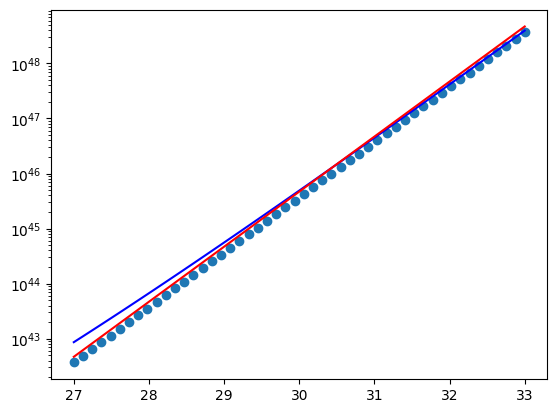

In [14]:
fig, ax = plt.subplots()
ax.plot(l2500_array, Lbol, c='b')
ax.plot(l2500_array, Lad, c = 'r')
ax.scatter(l2500_array, 10**(l2500_array+15.56778047))
ax.set_yscale('log')

In [16]:
np.polyfit(l2500_array, np.log10(Lad), 1)

array([ 1.        , 15.67097221])

Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See
the documentation of the method for more information.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    poi